# **Feature Selection and Dimensionality Reduction Techniques on California House Price Dataset**

**Purpose:**
1. Exploring and understanding California Housing Dataset.
2. Implementing a linear regression on the California Housing Dataset.
3. Implementing various feature selection and dimensionality reduction techniques and evaluating linear regression model with R2 Score and MSE


In [182]:
##############################
## Step 1: Loading Relevant modules
##############################
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

**Reference links used:**
1. [California Housing data from Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing)
2. [To understand Housing data type](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html)

In [183]:
##############################
## Step 2:Loading Data
##############################
housing = fetch_california_housing()

## Step 2.1: Converting data from matrix to data frame to analyze data better way
feature_names = housing['feature_names']
data = housing['data']
target = housing['target']
df1 = pd.DataFrame(data=data)
df1.rename(columns={0: feature_names[0], 1: feature_names[1], 2: feature_names[2],
                    3: feature_names[3], 4: feature_names[4], 5: feature_names[5],
                    6: feature_names[6], 7: feature_names[7]}, inplace=True)
df2 = pd.DataFrame(data=target)
df2.rename(columns={0: 'Target'}, inplace=True)
housing_df = pd.concat([df1, df2], axis=1)



In [184]:
housing_df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [160]:
##############################
## Step 3:EDA (Exploratory Data Analysis)
##############################

**`Basic Information:`**

California is a state in the Western United States, lying on the American Pacific Coast.
This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bureau publishes sample data (a block group typically has a population
of 600 to 3,000 people).

A household is a group of people residing within a home. Since the average
number of rooms and bedrooms in this dataset are provided per household, these
columns may take surprisingly large values for block groups with few households
and many empty houses, such as vacation resorts.

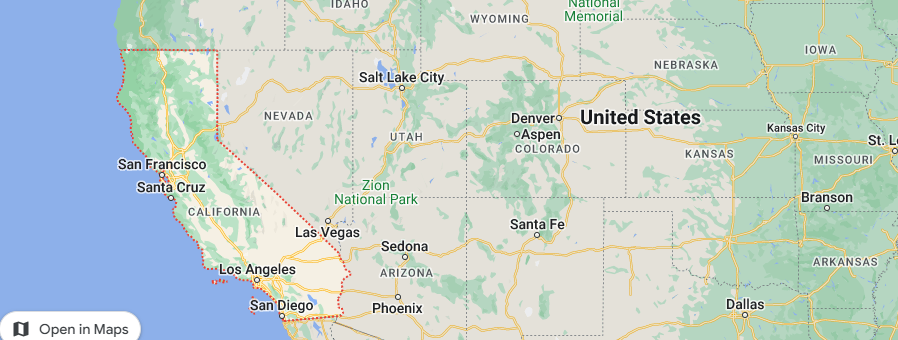


**`Attribute Information:`**

        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude
        - Target        the median house value for California districts,expressed in hundreds of thousands of dollars ($100,000)


**`Entities Involed:`**

  block

**`Data recording Process:`**

  Each row represents an block of California state. As we have total **20640** number of rows, you can imagine that we have broken California state into small **20640 blocks** and has collected infromation about each block like population, median income, geographical location etc.)

**`Capturing Knowledge:`**


**`Insights:`**

  1. Target is correlated with MedInc
  2. Longitude and Latitude is highly correlated, to remove this multi-colinearity we will remove Longitude and keep Latitude as it is more correlated with Target variable.
  3. AveRooms,AveOccup,AveBedrms are highly skewed feature, we can apply log transformations and check correlation with target variable
  4. Since Target is not highly correlated with HouseAge and Population, we can remove them.
  5. We can observe sudden high spike in number of blocks in Target variable for 5 which shows that California is one of the costly real estate.

In [185]:
##############################
## Step 4: Model Developement
##############################

## below variable will store performance of all the feature selection methods
experiment_tracker=pd.DataFrame(columns=['experiment_name','excluded_features','selected_features', 'r2_score', 'mse'])

def linear_regression_california_housing(experiment_name,data_for_model): # Model training,prediction and evalution

  ## 4.0: Extracting which features are getting used
  global housing_df

  original_features= list(housing_df.columns)
  original_features.remove('Target')

  experiment_features=list(data_for_model.columns)
  experiment_features.remove('Target')

  # to compare feature list and identify excluded variables
  excluded_features=[]
  for i in range(len(original_features)):
    if original_features[i] not in experiment_features:
      excluded_features.append(original_features[i])

  ## 4.1: Spliting data into train and test
  X_train, X_test, y_train, y_test = train_test_split(data_for_model.loc[:, data_for_model.columns != 'Target'], data_for_model['Target'], random_state=0)

  ## 4.2: Training the model
  LR_model = LinearRegression()
  LR_model.fit(X_train, y_train)

  ## 4.3: Predicting for test
  y_pred=LR_model.predict(X_test)

  ## 4.4: Evaluating Model - R2
  r2_score = LR_model.score(X_train, y_train)

  ## 4.5: Evaluating Model - MSE
  mse = mean_squared_error(y_test, y_pred)

  ## 4.6: Adding data to experiment tracker
  if excluded_features == [] : excluded_features=None
  if experiment_features == [] : experiment_features=None
  experiment_results=pd.DataFrame({'experiment_name':[experiment_name],
                                   'excluded_features':[excluded_features],
                                   'selected_features':[experiment_features],
                                               'r2_score':[r2_score],
                                               'mse':[mse]})

  ## 4.7: Printing result of experiment
  print("Experiment Name: ",experiment_name)
  print("Excluded features: ",excluded_features)
  print("Selected features: ",experiment_features)
  print("R-square of Linear Regression on training set: {:.3f}".format(r2_score))
  print("MSE of Linear Regression on test set: {:.3f}".format(mse))

  return experiment_results

In [186]:
##############################
## Step 5 : Base Model Run - with all feature
##############################
experiment_tracker=linear_regression_california_housing("Base Model Run - with all feature",housing_df)



Experiment Name:  Base Model Run - with all feature
Excluded features:  None
Selected features:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
R-square of Linear Regression on training set: 0.611
MSE of Linear Regression on test set: 0.540


# **Supervised Feature Selection Techniques**

Reference: https://scikit-learn.org/stable/modules/feature_selection.[link text](https://)html#univariate-feature-selection


# Category 1: Filter Based Methods

*   These methods evaluate each feature independently and select features based on a statistical measure without involving a machine learning model.
*   Faster and computationally less expensive
* Types of Filter based methods:


  1. **VarianceThreshold**: This removes features with low variance, which are unlikely to be informative for the model.
  2. **SelectKBest**: This selects a specific number (k) of features based on a univariate statistical test like chi-square, mutual information, or F-test.
  3. **SelectPercentile**: This removes all but a user-specified percentage of features with the highest scores on a univariate statistical test.

**Univariate statistical test:**

1.   **Mutual Information**:
  *   Non-negative number, based on KL Divergence (similarity metric b/w distributions) It's zero if the variables are independent and increases as their dependence strengthens
  *   Can be used for both classification and regression problems
  *   Can be used to pick up all kinds of relationships (even non-linear ones)


2.   **Pearson Correlation**:
  *   determine the strength and direction of target and feature.
  *   A positive correlation (r between 0 and 1) means as one variable increases, the other tends to increase as well (e.g., taller people tend to weigh more).
  *   A negative correlation (r between -1 and 0) indicates that as one variable goes up, the other tends to go down (e.g., more studying hours might lead to less sleep).
  *   A zero correlation (r close to 0) suggests no linear relationship between the variables (height and shoe size might not have a strong linear connection).
  *   Pearson correlation only captures linear relationships

3.   **F statistics**:
*   It calculates an F-statistic based on the explained variance in each single regression model.
*   A higher F-statistic suggests a stronger relationship between the feature and the target variable.
*   It also provides a p-value which indicates the statistical significance of this relationship.


4. **Chi-Square Test**:
  *   Is used only for classification problems
  *   calculate number based on the difference between the expected and observed distributions. Higher chi-square values indicate a larger discrepancy.
  *   Will not implement in this project as we are working linear regression problem.










In [187]:
##############################
## Step 6: Exp 1 - Variance Threshold of 70%
##############################
from sklearn.feature_selection import VarianceThreshold
selector=VarianceThreshold(threshold=(0.7)) # threshold set to 70%
selector.set_output(transform="pandas") # output should be in pandas dataframe
housing_df_exp=selector.fit_transform(housing_df.loc[:, housing_df.columns != 'Target']) # Except target column all the columns are passed
housing_df_exp = housing_df_exp.join(housing_df[['Target']], how='outer') # appended target variable
exp_result=linear_regression_california_housing("Exp 1 - Variance Threshold of 70%",housing_df_exp) # conducting experiment
experiment_tracker=pd.concat([experiment_tracker,exp_result])


Experiment Name:  Exp 1 - Variance Threshold of 70%
Excluded features:  ['AveBedrms']
Selected features:  ['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
R-square of Linear Regression on training set: 0.602
MSE of Linear Regression on test set: 0.557


In [188]:
##############################
## Step 7: Exp 2 - SelectKBest with mutual info : top 4 features
##############################
from sklearn.feature_selection import mutual_info_regression, SelectKBest
selector=SelectKBest(mutual_info_regression, k=4) # select top 4 features
selector.set_output(transform="pandas") # output should be in pandas dataframe
housing_df_exp=selector.fit_transform(housing_df.loc[:, housing_df.columns != 'Target'], housing_df['Target'])
housing_df_exp = housing_df_exp.join(housing_df[['Target']], how='outer') # appended target variable
exp_result=linear_regression_california_housing("Exp 2 - SelectKBest with mutual info : top 4 features",housing_df_exp) # conducting experiment
experiment_tracker=pd.concat([experiment_tracker,exp_result])



Experiment Name:  Exp 2 - SelectKBest with mutual info : top 4 features
Excluded features:  ['HouseAge', 'AveBedrms', 'Population', 'AveOccup']
Selected features:  ['MedInc', 'AveRooms', 'Latitude', 'Longitude']
R-square of Linear Regression on training set: 0.590
MSE of Linear Regression on test set: 0.569


In [189]:
##############################
## Step 8: Exp 3 - SelectKBest with pearson correlation : top 4 features
##############################
from sklearn.feature_selection import r_regression, SelectKBest
selector=SelectKBest(r_regression, k=4) # select top 4 features
selector.set_output(transform="pandas") # output should be in pandas dataframe
housing_df_exp=selector.fit_transform(housing_df.loc[:, housing_df.columns != 'Target'], housing_df['Target'])
housing_df_exp = housing_df_exp.join(housing_df[['Target']], how='outer') # appended target variable
exp_result=linear_regression_california_housing("Exp 3 - SelectKBest with pearson correlation : top 4 features",housing_df_exp) # conducting experiment
experiment_tracker=pd.concat([experiment_tracker,exp_result])


Experiment Name:  Exp 3 - SelectKBest with pearson correlation : top 4 features
Excluded features:  ['AveBedrms', 'Population', 'Latitude', 'Longitude']
Selected features:  ['MedInc', 'HouseAge', 'AveRooms', 'AveOccup']
R-square of Linear Regression on training set: 0.521
MSE of Linear Regression on test set: 0.673


In [190]:
##############################
## Step 9: Exp 4 - SelectKBest with F statistics : top 4 features
##############################
from sklearn.feature_selection import f_regression, SelectKBest
selector=SelectKBest(f_regression, k=4) # select top 4 features
selector.set_output(transform="pandas") # output should be in pandas dataframe
housing_df_exp=selector.fit_transform(housing_df.loc[:, housing_df.columns != 'Target'], housing_df['Target'])
housing_df_exp = housing_df_exp.join(housing_df[['Target']], how='outer') # appended target variable
exp_result=linear_regression_california_housing("Exp 4 - SelectKBest with F statistics : top 4 features",housing_df_exp) # conducting experiment
experiment_tracker=pd.concat([experiment_tracker,exp_result])

Experiment Name:  Exp 4 - SelectKBest with F statistics : top 4 features
Excluded features:  ['AveBedrms', 'Population', 'AveOccup', 'Longitude']
Selected features:  ['MedInc', 'HouseAge', 'AveRooms', 'Latitude']
R-square of Linear Regression on training set: 0.526
MSE of Linear Regression on test set: 0.665


In [191]:
##############################
## Step 10: Exp 5 - SelectPercentile with mutual info : top 50 percentile
##############################
from sklearn.feature_selection import mutual_info_regression, SelectPercentile
selector=SelectPercentile(mutual_info_regression, percentile=50) # top 50 percentile
selector.set_output(transform="pandas") # output should be in pandas dataframe
housing_df_exp=selector.fit_transform(housing_df.loc[:, housing_df.columns != 'Target'], housing_df['Target'])
housing_df_exp = housing_df_exp.join(housing_df[['Target']], how='outer') # appended target variable
exp_result=linear_regression_california_housing("Exp 5 - SelectPercentile with mutual info : top 50 percentile",housing_df_exp) # conducting experiment
experiment_tracker=pd.concat([experiment_tracker,exp_result])



Experiment Name:  Exp 5 - SelectPercentile with mutual info : top 50 percentile
Excluded features:  ['HouseAge', 'AveBedrms', 'Population', 'AveOccup']
Selected features:  ['MedInc', 'AveRooms', 'Latitude', 'Longitude']
R-square of Linear Regression on training set: 0.590
MSE of Linear Regression on test set: 0.569


In [192]:
##############################
## Step 11: Exp 6 - SelectPercentile with pearson correlation : top 50 percentile
##############################
from sklearn.feature_selection import r_regression, SelectPercentile
selector=SelectPercentile(r_regression, percentile=50) # top 50 percentile
selector.set_output(transform="pandas") # output should be in pandas dataframe
housing_df_exp=selector.fit_transform(housing_df.loc[:, housing_df.columns != 'Target'], housing_df['Target'])
housing_df_exp = housing_df_exp.join(housing_df[['Target']], how='outer') # appended target variable
exp_result=linear_regression_california_housing("Exp 6 - SelectPercentile with pearson correlation : top 50 percentile",housing_df_exp) # conducting experiment
experiment_tracker=pd.concat([experiment_tracker,exp_result])


Experiment Name:  Exp 6 - SelectPercentile with pearson correlation : top 50 percentile
Excluded features:  ['AveBedrms', 'Population', 'Latitude', 'Longitude']
Selected features:  ['MedInc', 'HouseAge', 'AveRooms', 'AveOccup']
R-square of Linear Regression on training set: 0.521
MSE of Linear Regression on test set: 0.673


In [193]:
##############################
## Step 12: Exp 7 - SelectPercentile with F statistics : top 50 percentile
##############################
from sklearn.feature_selection import f_regression, SelectPercentile
selector=SelectPercentile(f_regression, percentile=50) # top 50 percentile
selector.set_output(transform="pandas") # output should be in pandas dataframe
housing_df_exp=selector.fit_transform(housing_df.loc[:, housing_df.columns != 'Target'], housing_df['Target'])
housing_df_exp = housing_df_exp.join(housing_df[['Target']], how='outer') # appended target variable
exp_result=linear_regression_california_housing("Exp 7 - SelectPercentile with F statistics : top 50 percentile",housing_df_exp) # conducting experiment
experiment_tracker=pd.concat([experiment_tracker,exp_result])

Experiment Name:  Exp 7 - SelectPercentile with F statistics : top 50 percentile
Excluded features:  ['AveBedrms', 'Population', 'AveOccup', 'Longitude']
Selected features:  ['MedInc', 'HouseAge', 'AveRooms', 'Latitude']
R-square of Linear Regression on training set: 0.526
MSE of Linear Regression on test set: 0.665


# Category 2: Wrapper Based Methods

- Optimizing the performance of a specific machine learning model
- Train a model on different subsets of features, and select the most accurate one.
- Computationally Expensive
- Types of wrapper based methods:
1. **RFE**:
Features with low importance contribute less to the model's ability to predict the target variable (in regression). RFE gradually removes these features, leading to a smaller feature subset that is still informative for the model while potentially reducing overfitting and improving training speed.

2. **Select From Model**:It acts as a meta-transformer, meaning it leverages the capabilities of another estimator (model) to identify relevant features for your dataset.
3. **Sequential Feture Selection**: SFS is a general approach for selecting a subset of relevant features from a dataset. It iteratively adds or removes features based on a specific criterion, aiming to improve the performance of a machine learning model. There are two main variants of SFS:



In [194]:
##############################
## Step 13: Exp 8 - RFE - Lasso - 4 features
##############################
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso

estimator = Lasso()
selector = RFE(estimator, n_features_to_select=4, step=1) # RFE
selector.set_output(transform="pandas") # output should be in pandas dataframe
housing_df_exp=selector.fit_transform(housing_df.loc[:, housing_df.columns != 'Target'], housing_df['Target'])
housing_df_exp = housing_df_exp.join(housing_df[['Target']], how='outer') # appended target variable
exp_result=linear_regression_california_housing("Exp 8 - RFE - Lasso - 4 features",housing_df_exp) # conducting experiment
experiment_tracker=pd.concat([experiment_tracker,exp_result])

Experiment Name:  Exp 8 - RFE - Lasso - 4 features
Excluded features:  ['AveRooms', 'AveBedrms', 'AveOccup', 'Latitude']
Selected features:  ['MedInc', 'HouseAge', 'Population', 'Longitude']
R-square of Linear Regression on training set: 0.518
MSE of Linear Regression on test set: 0.680


In [195]:
##############################
## Step 14: Exp 9 - Select from Model - Lasso on regression
##############################
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

estimator = Lasso()
estimator.fit(housing_df.loc[:, housing_df.columns != 'Target'], housing_df['Target'])
selector = SelectFromModel(estimator, threshold='mean') # Select from model
selector.set_output(transform="pandas") # output should be in pandas dataframe
housing_df_exp=selector.fit_transform(housing_df.loc[:, housing_df.columns != 'Target'], housing_df['Target'])
housing_df_exp = housing_df_exp.join(housing_df[['Target']], how='outer') # appended target variable
exp_result=linear_regression_california_housing("Exp 9 - Select from Model - Lasso on regression",housing_df_exp) # conducting experiment
experiment_tracker=pd.concat([experiment_tracker,exp_result])

Experiment Name:  Exp 9 - Select from Model - Lasso on regression
Excluded features:  ['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Selected features:  ['MedInc']
R-square of Linear Regression on training set: 0.481
MSE of Linear Regression on test set: 0.725


In [196]:
##############################
## Step 15: Exp 10 - Sequential Feature selection - Forward
##############################
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import Lasso

estimator = Lasso()
estimator.fit(housing_df.loc[:, housing_df.columns != 'Target'], housing_df['Target'])
selector = SequentialFeatureSelector(estimator, n_features_to_select="auto", direction="forward") # sequence feature selector - forward
selector.set_output(transform="pandas") # output should be in pandas dataframe
housing_df_exp=selector.fit_transform(housing_df.loc[:, housing_df.columns != 'Target'], housing_df['Target'])
housing_df_exp = housing_df_exp.join(housing_df[['Target']], how='outer') # appended target variable
exp_result=linear_regression_california_housing("Exp 10 - Sequential Feature selection - Forward",housing_df_exp) # conducting experiment
experiment_tracker=pd.concat([experiment_tracker,exp_result])

Experiment Name:  Exp 10 - Sequential Feature selection - Forward
Excluded features:  ['Population', 'AveOccup', 'Latitude', 'Longitude']
Selected features:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms']
R-square of Linear Regression on training set: 0.545
MSE of Linear Regression on test set: 0.642


In [197]:
##############################
## Step 16: Exp 11 - Sequential Feature selection - Backward
##############################
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import Lasso

estimator = Lasso()
estimator.fit(housing_df.loc[:, housing_df.columns != 'Target'], housing_df['Target'])
selector = SequentialFeatureSelector(estimator, n_features_to_select="auto", direction="backward") # sequence feature selector - backward
selector.set_output(transform="pandas") # output should be in pandas dataframe
housing_df_exp=selector.fit_transform(housing_df.loc[:, housing_df.columns != 'Target'], housing_df['Target'])
housing_df_exp = housing_df_exp.join(housing_df[['Target']], how='outer') # appended target variable
exp_result=linear_regression_california_housing("Exp 11 - Sequential Feature selection - Backward",housing_df_exp) # conducting experiment
experiment_tracker=pd.concat([experiment_tracker,exp_result])

Experiment Name:  Exp 11 - Sequential Feature selection - Backward
Excluded features:  ['AveRooms', 'AveBedrms', 'Population', 'AveOccup']
Selected features:  ['MedInc', 'HouseAge', 'Latitude', 'Longitude']
R-square of Linear Regression on training set: 0.600
MSE of Linear Regression on test set: 0.559


# Category 3: Embedded Methods
- As a function of the algorithm, feature selection automatically happens.
- Eg: Lasso Regularisation, Random-Forest

In [198]:
##############################
## Step 17: Exp 12 - Lasso
##############################
experiment_name="Exp 12 - Lasso"

from sklearn.linear_model import Lasso

## 4.1: Spliting data into train and test
X_train, X_test, y_train, y_test = train_test_split(housing_df.loc[:, housing_df.columns != 'Target'], housing_df['Target'], random_state=0)

## 4.2: Training the model
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

## 4.3: Predicting for test
y_pred=lasso_model.predict(X_test)

## 4.4: Evaluating Model - R2
r2_score = lasso_model.score(X_train, y_train)

## 4.5: Evaluating Model - MSE
mse = mean_squared_error(y_test, y_pred)

## 4.6: Adding data to experiment tracker
excluded_features=[]
experiment_features=[]
if excluded_features == [] : excluded_features=None
if experiment_features == [] : experiment_features=None
exp_result=pd.DataFrame({'experiment_name':[experiment_name],
                                  'excluded_features':[excluded_features],
                                  'selected_features':[experiment_features],
                                  'r2_score':[r2_score],
                                              'mse':[mse]})

## 4.7: Printing result of experiment
print("Experiment Name: ",experiment_name)
print("Excluded features: ",excluded_features)
print("Selected features: ",experiment_features)
print("R-square of Linear Regression on training set: {:.3f}".format(r2_score))
print("MSE of Linear Regression on test set: {:.3f}".format(mse))
experiment_tracker=pd.concat([experiment_tracker,exp_result])

Experiment Name:  Exp 12 - Lasso
Excluded features:  None
Selected features:  None
R-square of Linear Regression on training set: 0.292
MSE of Linear Regression on test set: 0.945


# **Unsupervised Feature Selection Techniques**

## PCA

- Dimenisonality Reduction technique that transforms the features into a new space where we can select features on the basis of variance captured (eigen values)
- Reference: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html


In [199]:
##############################
## Step 18: Exp 13 - PCA - 4 Components
##############################
from sklearn.decomposition import PCA

housing_df_exp = PCA(n_components=4, svd_solver='full').fit_transform(housing_df.loc[:, housing_df.columns != 'Target'])
housing_df_exp = pd.DataFrame(housing_df_exp)
housing_df_exp = housing_df_exp.join(housing_df[['Target']], how='outer') # appended target variable
exp_result=linear_regression_california_housing("Exp 13 - PCA - 4 Components",housing_df_exp) # conducting experiment
experiment_tracker=pd.concat([experiment_tracker,exp_result])

Experiment Name:  Exp 13 - PCA - 4 Components
Excluded features:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Selected features:  [0, 1, 2, 3]
R-square of Linear Regression on training set: 0.012
MSE of Linear Regression on test set: 1.313


In [200]:
experiment_tracker

,experiment_name,excluded_features,selected_features,r2_score,mse
0,Base Model Run - with all feature,None,"[MedInc, HouseAge, AveRooms, AveBedrms, Popula...",0.610963,0.540413
0,Exp 1 - Variance Threshold of 70%,[AveBedrms],"[MedInc, HouseAge, AveRooms, Population, AveOc...",0.601599,0.556502
0,Exp 2 - SelectKBest with mutual info : top 4 f...,"[HouseAge, AveBedrms, Population, AveOccup]","[MedInc, AveRooms, Latitude, Longitude]",0.590176,0.569147
0,Exp 3 - SelectKBest with pearson correlation :...,"[AveBedrms, Population, Latitude, Longitude]","[MedInc, HouseAge, AveRooms, AveOccup]",0.520839,0.673465
0,Exp 4 - SelectKBest with F statistics : top 4 ...,"[AveBedrms, Population, AveOccup, Longitude]","[MedInc, HouseAge, AveRooms, Latitude]",0.526108,0.665197
0,Exp 5 - SelectPercentile with mutual info : to...,"[HouseAge, AveBedrms, Population, AveOccup]","[MedInc, AveRooms, Latitude, Longitude]",0.590176,0.569147
0,Exp 6 - SelectPercentile with pearson correlat...,"[AveBedrms, Population, Latitude, Longitude]","[MedInc, HouseAge, AveRooms, AveOccup]",0.520839,0.673465
0,Exp 7 - SelectPercentile with F statistics : t...,"[AveBedrms, Population, AveOccup, Longitude]","[MedInc, HouseAge, AveRooms, Latitude]",0.526108,0.665197
0,Exp 8 - RFE - Lasso - 4 features,"[AveRooms, AveBedrms, AveOccup, Latitude]","[MedInc, HouseAge, Population, Longitude]",0.518237,0.679907
0,Exp 9 - Select from Model - Lasso on regression,"[HouseAge, AveRooms, AveBedrms, Population, Av...",[MedInc],0.480619,0.725353


In [202]:
# to Download Results to CSV
from google.colab import files

experiment_tracker.to_csv("experiment_results.csv")
files.download("experiment_results.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>